<a href="https://colab.research.google.com/github/jay0010/LGMVIP-DataScience/blob/main/LETS_GROW_MORE_VIRTUAL_INTERNSHIP_PROGRAM(VIP)_Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME : JAYAN KOKRU**
# **LETS GROW MORE VIRTUAL INTERNSHIP PROGRAM(VIP)**
# **BEGINNER LEVEL TASK :**

# **Music Recommendation:**

## **Music recommender systems can suggest songs to users based on their listening patterns.**

### **Datasetlinks  Watch Tutorial from here https://youtu.be/CBCfOTePVPo**


## **IMPORTING LIBRARIES**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from subprocess import check_output

## **IMPORTING DATASETS**

In [6]:
train = pd.read_csv("/content/train.csv")
songs = pd.read_csv("/content/songs.csv")
test = pd.read_csv("/content/test.csv")
members=pd.read_csv("/content/members.csv")
print('train',train.shape)
print('test',test.shape)
print('members',members.shape)
print('songs',songs.shape)

train (532123, 6)
test (533278, 6)
members (34403, 7)
songs (741395, 7)


## **PRINTING DATASETS STATS**

In [8]:
print('train')
print(train.head())
print('members')
print(members.head())
print('songs')
print(songs.head())

train
                                           msno  ... target
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=  ...    1.0
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=  ...    1.0
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=  ...    1.0
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=  ...    1.0
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=  ...    1.0

[5 rows x 6 columns]
members
                                           msno  ...  expiration_date
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=  ...         20170920
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=  ...         20170622
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=  ...         20170712
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=  ...         20150907
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=  ...         20170613

[5 rows x 7 columns]
songs
                                        song_id  ...  language
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=  ...       3.0
1  o0kFgae9QtnYgRkVPqLJwa05zIh

## **Times the user listens to a Song again**

In [39]:
print(train.target.value_counts()*100/train.target.value_counts().sum())
print('Number of  unique songs ',len(train.song_id.unique()))

1.0    72.44241
0.0    27.55759
Name: target, dtype: float64
Number of  unique songs  79771


## **Repeated Songs**

In [10]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
repeats=train[train.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']

In [38]:
song_repeats=pd.DataFrame(song_repeats).merge(songs,left_on='song_id',right_on='song_id')
print('Median Length of Repeated Songs',song_repeats.sort_values(by='count',ascending=False)[:2000].song_length.median())
print('Median Length of Repeated Songs',songs.song_length.median())

Median Length of Repeated Songs 246060.5
Median Length of Repeated Songs 229970.0


In [36]:
print("Top 20 Most Repeated Songs ")
repeats.song_id.value_counts()[:20]

Top 20 Most Repeated Songs 


T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    2097
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    1954
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    1789
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    1783
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=    1564
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    1471
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=    1310
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=    1291
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=    1289
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=    1283
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=    1244
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=    1212
fCCmIa0Y5m+MCGbQga31MOLTIqi7ddgXvkjFPmfslGw=    1150
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=    1089
OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=    1059
3VkD5ekIf5duJm1hmYTZlXjyl0zqV8wCzuAh3uocfCg=     947
wp1gSQ4LlMEF6bzvEaJl8VdHlAj/EJMTJ0ASrXeddbo=     940
L6w2d0w84FjTvFr+BhMfgu7dZAsGiOqUGmvvxIG3gvQ=     931
BITuBuNyXQydJcjDL2BUnCu4/IXaJg5IPOuycc/4dtY=  

## **Most Common Artists**

In [13]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

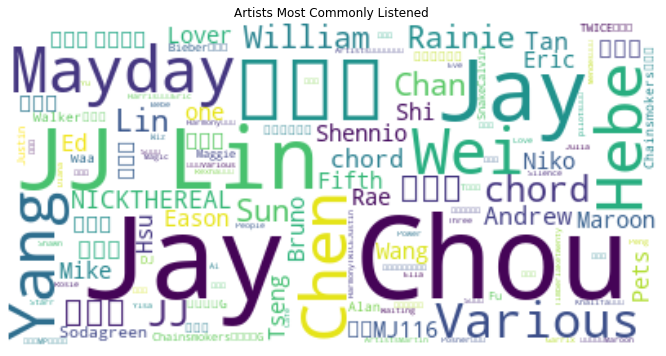

In [34]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].artist_name.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Artists Most Commonly Listened ')

## **Most Common Language songs**

Text(0.5, 0, 'Language')

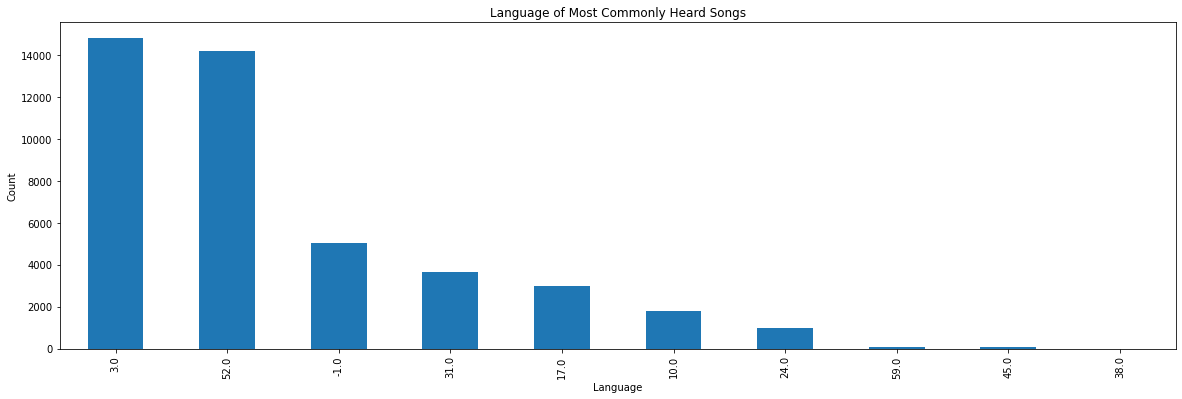

In [33]:
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')
plt.title('Language of Most Commonly Heard Songs')
plt.ylabel('Count')
plt.xlabel('Language')

Text(0, 0.5, 'Count')

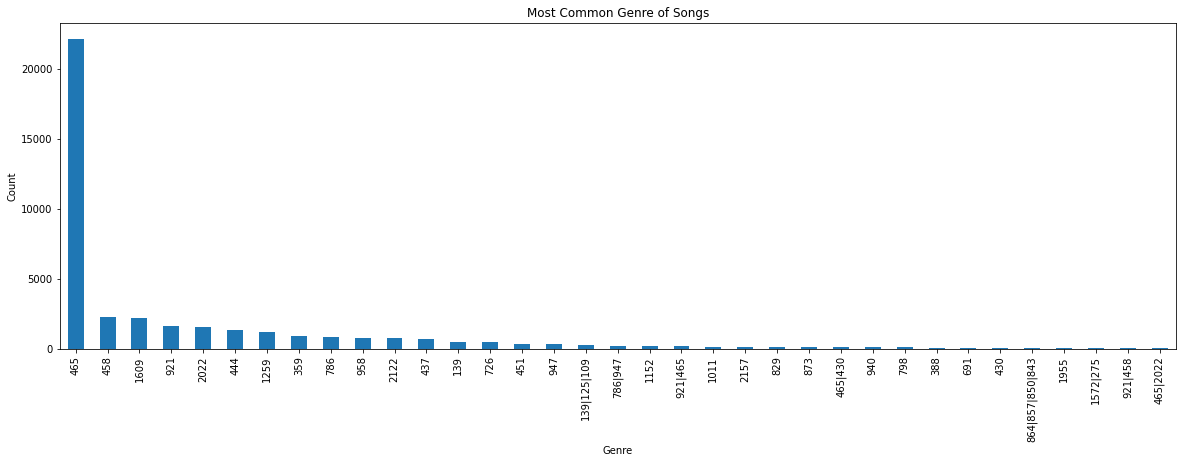

In [31]:
df.genre_ids.value_counts()[:35].plot(kind='bar')
plt.title('Most Common Genre of Songs')
plt.xlabel('Genre')
plt.ylabel('Count')

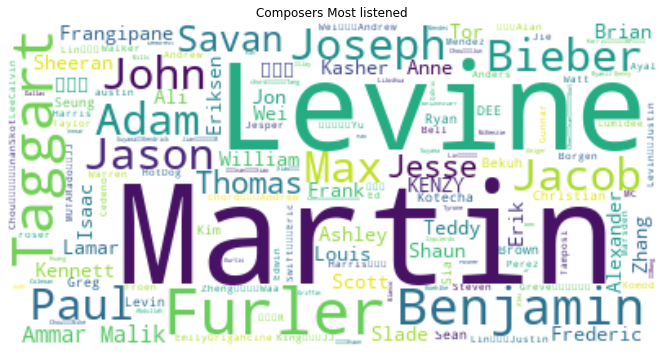

In [30]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].composer.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Composers Most listened ')

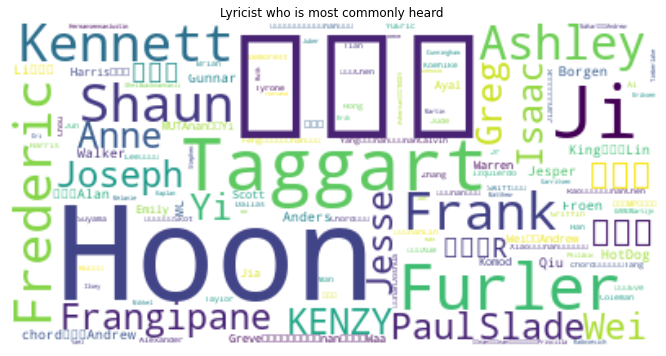

In [29]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].lyricist.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Lyricist who is most commonly heard ')

In [19]:
print('Users that listen to the same song again and again')
repeats.msno.value_counts()[:10]

Users that listen to the same song again and again


x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    447
04gL4TVAzollv/ansOnX8Ns2XKiSId1Hnloq+g2UlKk=    435
PZv9BpjrYdEDAve/vN2gETpp+PsAok9i1BMBnakD2xY=    392
UsmtoZnTIS+zAG+2RSYoMNCnuwfYfN2zPkNf+mu/JjE=    361
6XNzzi8wuyvsOJOK075FtInTPlgf1Rj8H/qBHkoTGFk=    345
EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    344
YQiox2a4tbRbNBaL+VfOLH8oea77HPJMPWRh8euXZqM=    342
1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=    337
07lCno3fuSM5XcKCBNtOIZBxumvUmEicmV+SBIAzPUo=    313
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    313
Name: msno, dtype: int64

Text(0, 0.5, 'count')

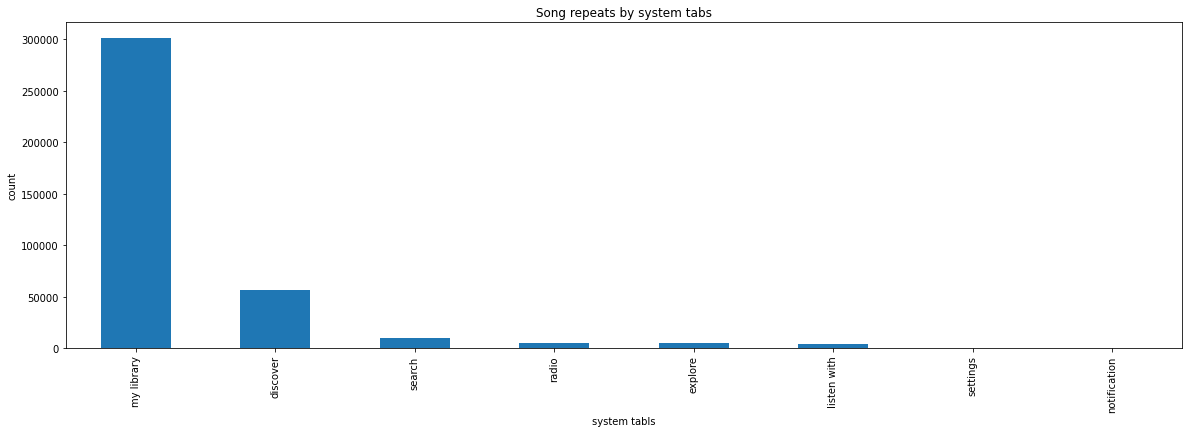

In [20]:
repeats.source_system_tab.value_counts().plot(kind='bar')
plt.title('Song repeats by system tabs')
plt.xlabel('system tabls')
plt.ylabel('count')

Text(0, 0.5, 'count')

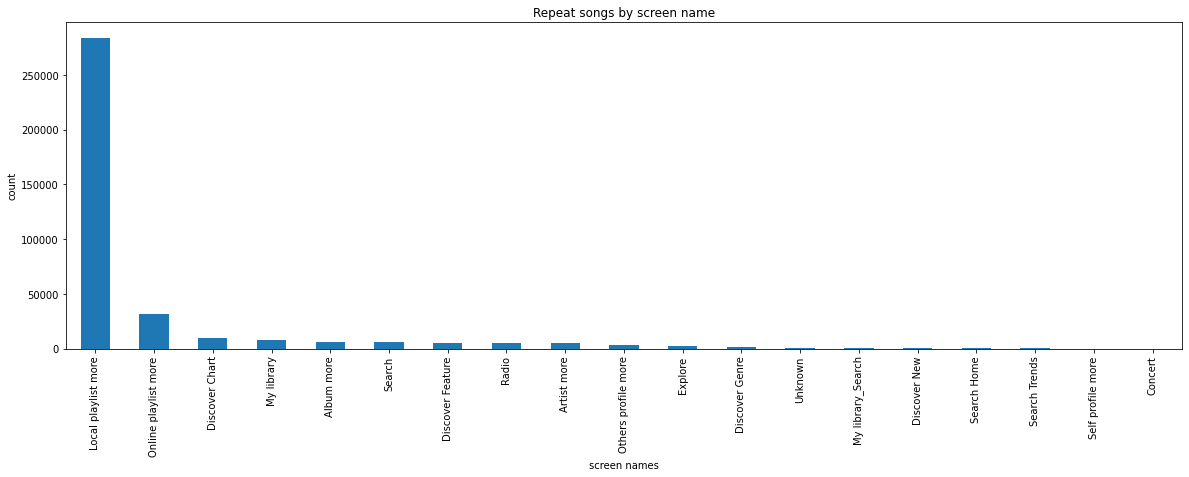

In [21]:
 repeats.source_screen_name.value_counts().plot(kind='bar')
plt.title('Repeat songs by screen name')
plt.xlabel('screen names')
plt.ylabel('count')

Text(0, 0.5, 'count')

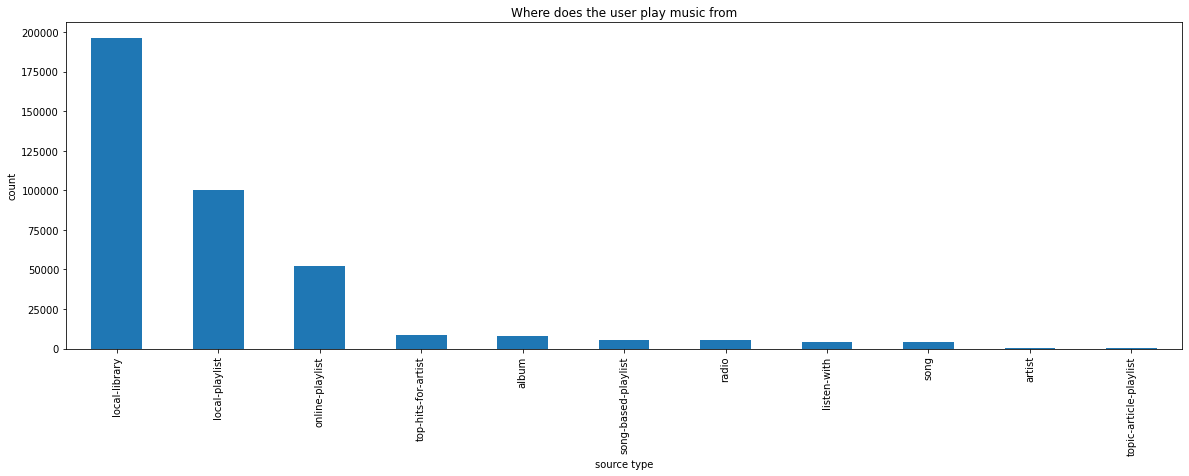

In [22]:
repeats.source_type.value_counts().plot(kind='bar')
plt.title('Where does the user play music from')
plt.xlabel('source type')
plt.ylabel('count')

In [24]:
user_repeats=repeats.merge(members,left_on='msno',right_on='msno',how='left')
print("Users who would repeat")
user_repeats.msno.value_counts()[:20]

Users who would repeat


x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    447
04gL4TVAzollv/ansOnX8Ns2XKiSId1Hnloq+g2UlKk=    435
PZv9BpjrYdEDAve/vN2gETpp+PsAok9i1BMBnakD2xY=    392
UsmtoZnTIS+zAG+2RSYoMNCnuwfYfN2zPkNf+mu/JjE=    361
6XNzzi8wuyvsOJOK075FtInTPlgf1Rj8H/qBHkoTGFk=    345
EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    344
YQiox2a4tbRbNBaL+VfOLH8oea77HPJMPWRh8euXZqM=    342
1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=    337
07lCno3fuSM5XcKCBNtOIZBxumvUmEicmV+SBIAzPUo=    313
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    313
MxCUQ6tAD7LU1yR0gwRck91ZKE88gY8kD/rX9Hi9srQ=    290
qsqSF3Vdoq3/K+5ixLV5Inym1cCQw8i0ghDqyRaOJm8=    289
w8lMQ9t/toEY+/cKrSN+BkRasE9FUFv5QmSwP2c4XB8=    289
ZlTSQ1AkVZHsqjmxT9LY720XxNAqkDyHspt2lpjZMm0=    285
voB5BRwu+CuLRhu6Y79hQ4HkbxMZOnfdcowIdPvvSnk=    277
8NthxmOVPiiilOtgBQs86xila73VHPztb412le30VNA=    272
Cf2pQVKTMukspQ3RDsMyF5VXd/P0Ct1CJsbma0iSB14=    271
V5VoBVlImRXYM7DGx3jk/OukL5lQtMfSj1zHIMoM9gM=    269
wv0o115CdKSsFlsV7VvHikjyxLG0LFc5qALhM8xkUZ4=    265
o+5RNlSWrzvr

Text(0, 0.5, 'Count')

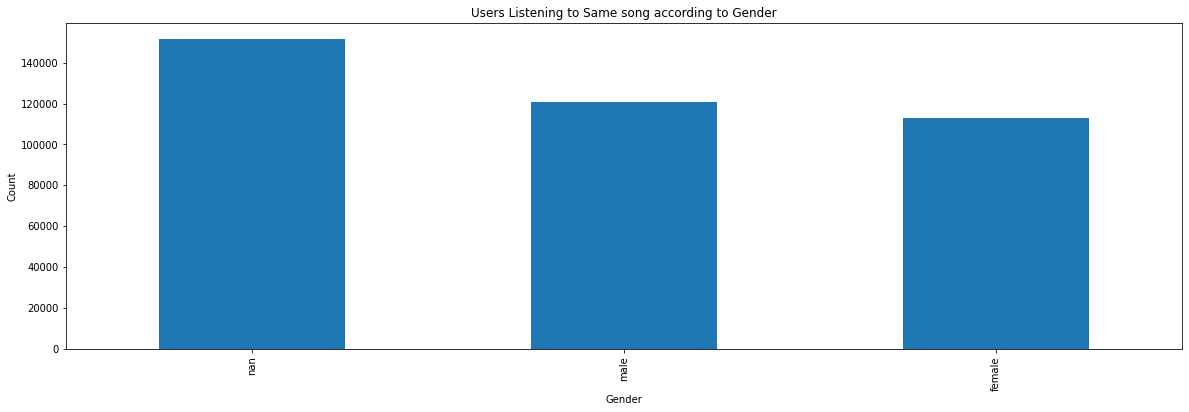

In [26]:
user_repeats.gender.value_counts(dropna=False).plot(kind='bar')
plt.title('Users Listening to Same song according to Gender')
plt.xlabel('Gender')
plt.ylabel("Count")

Text(0, 0.5, 'Count')

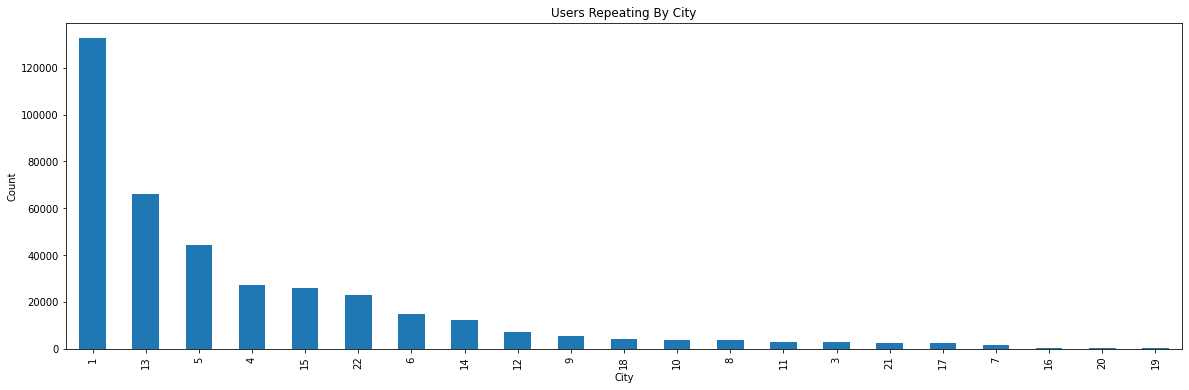

In [27]:
user_repeats.city.value_counts().plot(kind='bar')
plt.title('Users Repeating By City')
plt.xlabel('City')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

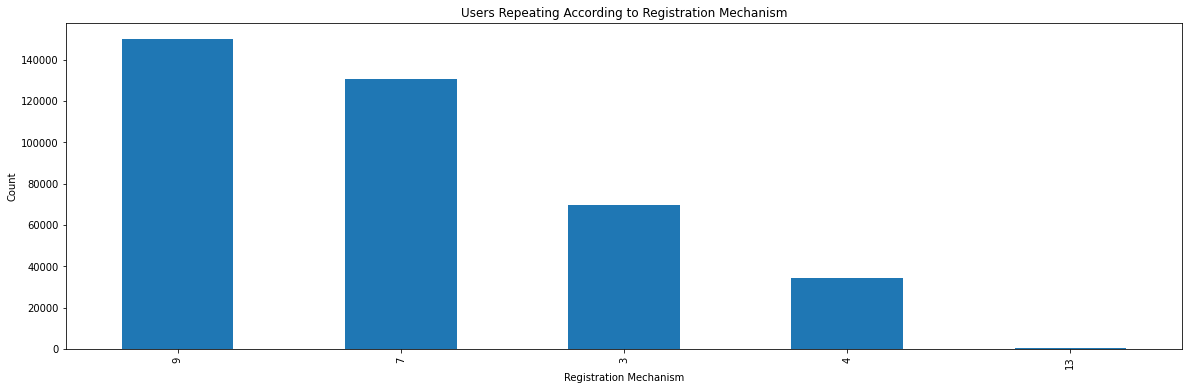

In [28]:
user_repeats.registered_via.value_counts().plot(kind='bar')
plt.title('Users Repeating According to Registration Mechanism')
plt.xlabel('Registration Mechanism')
plt.ylabel('Count')